# Modelación No Supervisada

## Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.ensemble import VotingRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
import cufflinks as cf
from termcolor import colored
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
cf.go_offline()

## Funciones

In [2]:
def k_optimo_kmeans(data_frame,k_min,k_max):
    
    sse,db,slc = {}, {}, {}
    for k in range(k_min, k_max+1):
        kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=210327, n_jobs=-1).fit(data_frame)
        clusters = kmeans.labels_
        sse[k] = kmeans.inertia_
        db[k] = davies_bouldin_score(data_frame,clusters)
        slc[k] = silhouette_score(data_frame,clusters)

    print(colored(f"Kmeans - Método del codo (Inercia)",'red',attrs=['bold']))
    plt.figure(figsize=(15,10))
    plt.plot(list(sse.keys()), list(sse.values()), "bx-")
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.show()

    print(colored(f"Kmeans - Davies-Bouldin",'red',attrs=['bold']))
    plt.figure(figsize=(15,10))
    plt.plot(list(db.keys()), list(db.values()), "bx-")
    plt.xlabel("Number of cluster")
    plt.ylabel("Davies-Bouldin values")
    plt.show()

    print(colored(f"Kmeans - Silhouette",'red',attrs=['bold']))
    plt.figure(figsize=(15,10))
    plt.plot(list(slc.keys()), list(slc.values()), "bx-")
    plt.xlabel("Number of cluster")
    plt.ylabel("Silhouette score")
    plt.show()
    
    
def k_optimo_aglomerative(data_frame,k_min,k_max,affini='euclidean',link='ward'):
    
    sse,db,slc = {}, {}, {}
    for k in range(k_min, k_max+1):
        Agglomerative = AgglomerativeClustering(n_clusters=k,affinity=affini,linkage=link ).fit(data_frame)
        clusters = Agglomerative.labels_
        #sse[k] = Agglomerative.inertia_
        db[k] = davies_bouldin_score(data_frame,clusters)
        slc[k] = silhouette_score(data_frame,clusters)

    #print(colored(f"Agglomerative - Método del codo (Inercia)",'red',attrs=['bold']))
    #plt.figure(figsize=(15,10))
    #plt.plot(list(sse.keys()), list(sse.values()), "bx-")
    #plt.xlabel("Number of cluster")
    #plt.ylabel("SSE")
    #plt.show()

    print(colored(f"Agglomerative - Davies-Bouldin",'red',attrs=['bold']))
    plt.figure(figsize=(15,10))
    plt.plot(list(db.keys()), list(db.values()), "bx-")
    plt.xlabel("Number of cluster")
    plt.ylabel("Davies-Bouldin values")
    plt.show()

    print(colored(f"Agglomerative - Silhouette",'red',attrs=['bold']))
    plt.figure(figsize=(15,10))
    plt.plot(list(slc.keys()), list(slc.values()), "bx-")
    plt.xlabel("Number of cluster")
    plt.ylabel("Silhouette score")
    plt.show()
    
def k_optimo_kmedoids(data_frame,k_min,k_max,metrica='euclidean'):
    
    sse,db,slc = {}, {}, {}
    for k in range(k_min, k_max+1):
        kmedoids = KMedoids(n_clusters=k,max_iter=1000, random_state=210327,metric=metrica ).fit(data_frame)
        clusters = kmedoids.labels_
        sse[k] = kmedoids.inertia_
        db[k] = davies_bouldin_score(data_frame,clusters)
        slc[k] = silhouette_score(data_frame,clusters)

    print(colored(f"Kmedoids - Método del codo (Inercia)",'red',attrs=['bold']))
    plt.figure(figsize=(15,10))
    plt.plot(list(sse.keys()), list(sse.values()), "bx-")
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.show()

    print(colored(f"Kmedoids - Davies-Bouldin",'red',attrs=['bold']))
    plt.figure(figsize=(15,10))
    plt.plot(list(db.keys()), list(db.values()), "bx-")
    plt.xlabel("Number of cluster")
    plt.ylabel("Davies-Bouldin values")
    plt.show()

    print(colored(f"Kmedoids - Silhouette",'red',attrs=['bold']))
    plt.figure(figsize=(15,10))
    plt.plot(list(slc.keys()), list(slc.values()), "bx-")
    plt.xlabel("Number of cluster")
    plt.ylabel("Silhouette score")
    plt.show()
    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # improves plot aesthetics


def _invert(x, limite):
    """inverte valores a escla"""
    return limite[1] - (x - limite[0])

def _scale_data(data, rango):
    """escala"""
    for d, (y1, y2) in zip(data, rango):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = rango[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], rango[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) * (x2 - x1) + x1)
    return sdata

def set_rgrids(self, radii, labels=None, angle=None, fmt=None,
               **kwargs):
    """ COnfiguración del radio
    """
    radii = self.convert_xunits(radii)
    radii = np.asarray(radii)
    rmin = radii.min()

    self.set_yticks(radii)
    if labels is not None:
        self.set_yticklabels(labels)
    elif fmt is not None:
        self.yaxis.set_major_formatter(FormatStrFormatter(fmt))
    if angle is None:
        angle = self.get_rlabel_position()
    self.set_rlabel_position(angle)
    for t in self.yaxis.get_ticklabels():
        t.update(kwargs)
    return self.yaxis.get_gridlines(), self.yaxis.get_ticklabels()

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.05,0.05,0.95,0.95],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
            ax.yaxis.label.set_size(400)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] 
                          
            gridlabel[0] = "" 
            set_rgrids(ax, grid, labels=gridlabel, angle=angles[i])
            ax.set_ylim(*ranges[i])
    
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

## Importar Tabal de Datos Limpia

In [3]:
data = pd.read_csv('real_estate.csv')

## Estructura de Datos

In [4]:
data.head()

d_created_on      c_lat      c_lon    c_price  c_surface_covered_in_m2  \
0   2014-01-02  19.497295 -96.879250   750000.0                     90.0   
1   2014-01-02  19.200068 -96.170279   140000.0                    174.5   
2   2014-01-02  19.497295 -96.879250   440000.0                     60.0   
3   2014-01-02  19.497295 -96.879250  2950000.0                    177.0   
4   2014-01-02  19.497295 -96.879250   750000.0                     70.0   

                          v_estado  v_anio_2015  v_anio_2016  v_mes_2  \
0  Veracruz de Ignacio de la Llave            0            0        0   
1  Veracruz de Ignacio de la Llave            0            0        0   
2  Veracruz de Ignacio de la Llave            0            0        0   
3  Veracruz de Ignacio de la Llave            0            0        0   
4  Veracruz de Ignacio de la Llave            0            0        0   

   v_mes_3  ...  descr_comedor  descr_id  descr_nocnok  descr_recamaras  \
0        0  ...              1         0             0                2   
1        0  ...              0         0             0                1   
2        0  ...              1         0             0                1   
3        0  ...              1         0             0                0   
4        0  ...              1         0             0                1   

   descr_sala  descr_sistema  v_region_norte  v_region_sur  v_tamanio_grande  \
0           1              0               0             0                 0   
1           0              0               0             0                 1   
2           1              0               0             0                 0   
3           1              0               0             0                 0   
4           1              0               0             0                 0   

   v_tamanio_mediano  
0                  1  
1                  0  
2                  1  
3                  1  
4                  1  

[5 rows x 53 columns]

_Esta tabla se obtiene del procesamiento final que se realizó en el módulo pasado, se dejan las variables de estado como categoría para realizar un enriquecimiento de datos. De nueva cuenta las variables más importantes para el modelo serán elegidas._

## Enriquecimiento de Tabla

_Se agregan nuevas variables para enriquecer el conjunto de datos. Esta variables incluyen la superficie de cada estado, población y tasa hipotecario promedio del año de publicación. Con las nuevas características se calcula una nueva variable de densidad de población por km cuadrado._

In [5]:
estados = list(data['v_estado'].value_counts().index.sort_values())

# datos de superficie por inegi
superficie = [5616,71450,73909,57507,73311,247455,151562,5627,1495,123317,22351,30608,63596,20813,78588,58599,
              4879,27857,64156,93757,34306,11699,44705,61137,58200,179355,24731,80249,4016,71826,39524,75284]

# diccionario de superficie
sup_estado = dict(zip(estados, superficie))

In [6]:
# Población
poblacion = [1312544,3315766,712029,899931,5217908,3556574,2954915,711235,8918653,1754754,16187608,5853677,
             3533251,2858359,7844830,4584471,1903811,1181050,5119504,3967889,6168883,2038372,1501562,2717820,
             2966321,2850330,2395272,3441698,1272847,8112505,2097175,1579209]

# diccionario de población
pob_estado = dict(zip(estados, poblacion))

In [7]:
# tasa hipotecaria promedio por año datos Banxico
tasa_hipotecaria = {2013: 0.119145454545455, 2014: 0.107691666666667,
                   2015: 0.103133333333333, 2016: 0.102191666666667}

In [8]:
## nuevas variables
# población
data['c_poblacion'] = data['v_estado'].apply(lambda x: pob_estado[x])
# superficie
data['c_superficie'] = data['v_estado'].apply(lambda x: sup_estado[x])
# densidad poblacional
data['c_densidad'] = data['c_poblacion'] / data['c_superficie']
# tasa hipotecaria
data['c_tasa'] = pd.to_datetime(data['d_created_on']).apply(lambda x: tasa_hipotecaria[x.year])
# dummy estados
data = pd.get_dummies(data, columns = ['v_estado'], drop_first = True)

In [9]:
"""# columnas a analizar
columnas = ['c_lat', 'c_lon', 'c_surface_covered_in_m2',
            'c_poblacion', 'c_superficie', 'c_densidad','c_tasa', 'v_conteo_geo',
       'v_anio_2015', 'v_anio_2016', 'v_mes_2', 'v_mes_3', 'v_mes_4',
       'v_mes_5', 'v_mes_6', 'v_mes_7', 'v_mes_8', 'v_mes_9', 'v_mes_10',
       'v_mes_11', 'v_mes_12', 'v_dia_semama_Jueves', 'v_dia_semama_Lunes',
       'v_dia_semama_Martes', 'v_dia_semama_Miercoles', 'v_dia_semama_Sábado',
       'v_dia_semama_Viernes', 'v_operation_sell', 'v_property_type_house',
       'v_property_type_store', 'title_casa', 'title_centro',
       'title_departamento', 'title_fracc', 'title_local', 'title_lomas',
       'title_renta', 'title_residencial', 'title_san', 'title_venta',
       'descr_baao', 'descr_br', 'descr_casa', 'descr_cocina', 'descr_comedor',
       'descr_id', 'descr_nocnok', 'descr_recamaras', 'descr_sala',
       'descr_sistema', 'v_region_norte', 'v_region_sur', 'v_tamanio_grande',
       'v_tamanio_mediano', 'v_estado_Baja California', 'v_estado_Baja California Sur',
       'v_estado_Campeche', 'v_estado_Chiapas', 'v_estado_Chihuahua',
       'v_estado_Coahuila de Zaragoza', 'v_estado_Colima',
       'v_estado_Distrito Federal', 'v_estado_Durango',
       'v_estado_Estado de MÃ©xico', 'v_estado_Guanajuato',
       'v_estado_Guerrero', 'v_estado_Hidalgo', 'v_estado_Jalisco',
       'v_estado_Morelos', 'v_estado_Nayarit', 'v_estado_Nuevo LeÃ³n',
       'v_estado_Oaxaca', 'v_estado_Puebla', 'v_estado_QuerÃ©taro',
       'v_estado_Quintana Roo', 'v_estado_San Luis PotosÃ­',
       'v_estado_Sinaloa', 'v_estado_Sonora', 'v_estado_Tabasco',
       'v_estado_Tamaulipas', 'v_estado_Tlaxcala',
       'v_estado_Veracruz de Ignacio de la Llave', 'v_estado_YucatÃ¡n',
       'v_estado_Zacatecas']"""

"# columnas a analizar\ncolumnas = ['c_lat', 'c_lon', 'c_surface_covered_in_m2',\n            'c_poblacion', 'c_superficie', 'c_densidad','c_tasa', 'v_conteo_geo',\n       'v_anio_2015', 'v_anio_2016', 'v_mes_2', 'v_mes_3', 'v_mes_4',\n       'v_mes_5', 'v_mes_6', 'v_mes_7', 'v_mes_8', 'v_mes_9', 'v_mes_10',\n       'v_mes_11', 'v_mes_12', 'v_dia_semama_Jueves', 'v_dia_semama_Lunes',\n       'v_dia_semama_Martes', 'v_dia_semama_Miercoles', 'v_dia_semama_Sábado',\n       'v_dia_semama_Viernes', 'v_operation_sell', 'v_property_type_house',\n       'v_property_type_store', 'title_casa', 'title_centro',\n       'title_departamento', 'title_fracc', 'title_local', 'title_lomas',\n       'title_renta', 'title_residencial', 'title_san', 'title_venta',\n       'descr_baao', 'descr_br', 'descr_casa', 'descr_cocina', 'descr_comedor',\n       'descr_id', 'descr_nocnok', 'descr_recamaras', 'descr_sala',\n       'descr_sistema', 'v_region_norte', 'v_region_sur', 'v_tamanio_grande',\n       'v_tamani

In [10]:
# separación conjunto de venta
data_sell = data[data['v_operation_sell'] == 1]
# separación conjunto de renta
data_rent = data[data['v_operation_sell'] == 0]

## Modelación No Supervisada

_COn la información recolectada de los inmuebles en México, se buscará encontrar las características que definene a un grupo de inmuebles en la república, esto facilitará la identificación y segementación del sector inmobiliario en el país._

_Como se ha trabajado, se dividirá la información de Venta y Renta en dos tablas diferentes para no segemetar por este tipo de operación._

### Reducción de Dimensiones

### PCA Venta

#### Escalamiento de Variables

In [11]:
## sample
data_sell_sample = data_sell.sample(frac = 0.10, random_state = 1702)
#venta
ss_sell = StandardScaler()
# X sell
X_sell = data_sell_sample.iloc[:, 1:]
# X scaler
X_ss_sell = ss_sell.fit_transform(X_sell)
# X final
X_ss_f = pd.DataFrame(X_ss_sell, columns = data_sell_sample.columns[1:])
X_ss_f.head()

c_lat     c_lon   c_price  c_surface_covered_in_m2  v_anio_2015  \
0 -1.650493 -0.324356 -0.866238                -0.192624     2.226876   
1 -0.511501 -0.245700  0.365885                -0.006038    -0.449060   
2 -0.429350 -0.125198  3.133969                 0.680939    -0.449060   
3  1.584846 -1.206652 -0.964731                -0.998338     2.226876   
4 -1.670540 -0.339126  0.943755                 0.002443    -0.449060   

   v_anio_2016   v_mes_2   v_mes_3   v_mes_4   v_mes_5  ...  \
0    -2.203306 -0.160267 -0.183063 -0.219572 -0.233447  ...   
1     0.453863 -0.160267 -0.183063 -0.219572 -0.233447  ...   
2     0.453863 -0.160267 -0.183063 -0.219572 -0.233447  ...   
3    -2.203306 -0.160267 -0.183063 -0.219572  4.283622  ...   
4     0.453863 -0.160267 -0.183063 -0.219572 -0.233447  ...   

   v_estado_Quintana Roo  v_estado_San Luis PotosÃ­  v_estado_Sinaloa  \
0              -0.014127                   -0.21017         -0.014127   
1              -0.014127                   -0.21017         -0.014127   
2              -0.014127                   -0.21017         -0.014127   
3              -0.014127                   -0.21017         -0.014127   
4              -0.014127                   -0.21017         -0.014127   

   v_estado_Sonora  v_estado_Tabasco  v_estado_Tamaulipas  v_estado_Tlaxcala  \
0        -0.017303          -0.11008            -0.156962           -0.06169   
1        -0.017303          -0.11008            -0.156962           -0.06169   
2        -0.017303          -0.11008            -0.156962           -0.06169   
3        -0.017303          -0.11008            -0.156962           -0.06169   
4        -0.017303          -0.11008            -0.156962           -0.06169   

   v_estado_Veracruz de Ignacio de la Llave  v_estado_YucatÃ¡n  \
0                                 -0.272959          -0.261603   
1                                 -0.272959          -0.261603   
2                                 -0.272959          -0.261603   
3                                 -0.272959          -0.261603   
4                                 -0.272959          -0.261603   

   v_estado_Zacatecas  
0           -0.038714  
1           -0.038714  
2           -0.038714  
3           -0.038714  
4           -0.038714  

[5 rows x 85 columns]

In [12]:
ss_params_sell = pd.DataFrame((ss_sell.mean_, ss_sell.var_), columns = X_ss_f.columns, index = ['mean', 'variance'])
ss_params_sell

c_lat      c_lon       c_price  c_surface_covered_in_m2  \
mean      20.336608 -98.814497  2.403522e+06               174.711913   
variance   4.330109   9.598026  3.623478e+12             13902.272413   

          v_anio_2015  v_anio_2016   v_mes_2   v_mes_3   v_mes_4   v_mes_5  \
mean         0.167814     0.829193  0.025042  0.032425  0.045994  0.051681   
variance     0.139652     0.141632  0.024415  0.031374  0.043879  0.049010   

          ...  v_estado_Quintana Roo  v_estado_San Luis PotosÃ­  \
mean      ...                 0.0002                   0.042303   
variance  ...                 0.0002                   0.040513   

          v_estado_Sinaloa  v_estado_Sonora  v_estado_Tabasco  \
mean                0.0002         0.000299          0.011972   
variance            0.0002         0.000299          0.011829   

          v_estado_Tamaulipas  v_estado_Tlaxcala  \
mean                 0.024045           0.003791   
variance             0.023467           0.003777   

          v_estado_Veracruz de Ignacio de la Llave  v_estado_YucatÃ¡n  \
mean                                      0.069341           0.064053   
variance                                  0.064532           0.059950   

          v_estado_Zacatecas  
mean                0.001497  
variance            0.001494  

[2 rows x 85 columns]

##### 2 Dimensiones

In [13]:
## PCA
pca_2 = PCA(n_components = 2)
## Data Frame
X_pca_2 = pd.DataFrame(data=pca_2.fit_transform(X_ss_f), columns=["p1", "p2"], index=X_ss_f.index)
X_pca_2.head()

p1        p2
0  2.618665 -2.018232
1  0.492907 -0.544640
2 -3.955960 -1.465538
3  0.779748  0.003106
4 -2.170810  0.273791

In [14]:
print('Cumulative Sum of Explained Variance 2 Dimensions')
pca_2.explained_variance_ratio_.cumsum()

Cumulative Sum of Explained Variance 2 Dimensions


array([0.07439962, 0.12911306])

In [15]:
X_pca_2.iplot(kind="scatter", mode="markers", x="p1", y="p2", title=f"PCA Venta", color = 'blue')

### MDS Venta

#### 2 Dimensiones

In [16]:
mds_2 = MDS(n_components=2, n_jobs=-1)
#Xsample_2 = X_ss_f.sample(frac = 0.05)
Xm_2 = pd.DataFrame(data=mds_2.fit_transform(X_ss_f), columns = ["d1", "d2"])

In [17]:
Xm_2.iplot(kind="scatter", mode="markers", x="d1", y="d2", title=f"MDS Venta", color = 'blue')

### t-SNE Venta

In [18]:
## 200 PERPLEXITY
tsne = TSNE(random_state=1702, perplexity=200, n_jobs = -1)
Xt = pd.DataFrame(data=tsne.fit_transform(X_ss_f), columns=["d1", "d2"])

In [19]:
Xt.iplot(x="d1", y="d2", kind="scatter", mode='markers', title=f"t-SNE Sell (perplexity: {200})", color = 'blue')

_Al comparar las gráficas de reducción de dimensiones, notanos que el método que tiene divisione más específicas es t-SNE. Con este método observamos por lo menos 10 grupos, que nos pueden ayudar a la elección de cantida de cluster a generar. Se analizarán dos clusters extremos para encontrar alguna diferencia notable entre ellos._ 

### PCA Renta

#### Escalamiento de Variables

In [20]:
data_rent_sample = data_rent.iloc[:, 1:].sample(frac = 0.1, random_state = 1702)
#venta
ss_rent = StandardScaler()
# X sell
X_rent = data_rent_sample
# X scaler
X_ss_rent = ss_rent.fit_transform(X_rent)
# X final
X_ss_f_r = pd.DataFrame(X_ss_rent, columns = data_rent_sample.columns)
X_ss_f_r.head()

c_lat     c_lon   c_price  c_surface_covered_in_m2  v_anio_2015  \
0  0.207543  2.703001 -0.050622                 1.228221     -0.45342   
1 -0.481632 -0.199387  1.809653                 0.029160     -0.45342   
2 -0.443825 -0.156397 -1.185389                -0.796859     -0.45342   
3  0.697081 -0.758676 -0.050622                -0.192888      2.20546   
4 -0.649115  0.060916 -0.004115                -0.015249     -0.45342   

   v_anio_2016   v_mes_2   v_mes_3   v_mes_4   v_mes_5  ...  \
0     0.454679 -0.158018 -0.176633 -0.234821 -0.250261  ...   
1     0.454679 -0.158018 -0.176633 -0.234821 -0.250261  ...   
2     0.454679 -0.158018 -0.176633 -0.234821 -0.250261  ...   
3    -2.199354 -0.158018 -0.176633 -0.234821 -0.250261  ...   
4     0.454679 -0.158018 -0.176633 -0.234821 -0.250261  ...   

   v_estado_Quintana Roo  v_estado_San Luis PotosÃ­  v_estado_Sinaloa  \
0                    0.0                  -0.208472               0.0   
1                    0.0                  -0.208472               0.0   
2                    0.0                  -0.208472               0.0   
3                    0.0                   4.796815               0.0   
4                    0.0                  -0.208472               0.0   

   v_estado_Sonora  v_estado_Tabasco  v_estado_Tamaulipas  v_estado_Tlaxcala  \
0              0.0          -0.17063            -0.207443          -0.056155   
1              0.0          -0.17063            -0.207443          -0.056155   
2              0.0          -0.17063            -0.207443          -0.056155   
3              0.0          -0.17063            -0.207443          -0.056155   
4              0.0          -0.17063            -0.207443          -0.056155   

   v_estado_Veracruz de Ignacio de la Llave  v_estado_YucatÃ¡n  \
0                                 -0.338764           3.737725   
1                                 -0.338764          -0.267542   
2                                 -0.338764          -0.267542   
3                                 -0.338764          -0.267542   
4                                 -0.338764          -0.267542   

   v_estado_Zacatecas  
0           -0.048612  
1           -0.048612  
2           -0.048612  
3           -0.048612  
4           -0.048612  

[5 rows x 85 columns]

In [21]:
ss_params_r = pd.DataFrame((ss_rent.mean_, ss_rent.var_), columns = X_ss_f_r.columns, index = ['mean', 'variance'])
ss_params_r

c_lat      c_lon       c_price  c_surface_covered_in_m2  \
mean      20.540421 -98.529480  1.554424e+04               141.716896   
variance   5.311146  10.938254  1.155862e+08             12676.096571   

          v_anio_2015  v_anio_2016   v_mes_2   v_mes_3   v_mes_4   v_mes_5  \
mean          0.17053     0.828684  0.024361  0.030255  0.052259  0.058939   
variance      0.14145     0.141967  0.023768  0.029340  0.049528  0.055465   

          ...  v_estado_Quintana Roo  v_estado_San Luis PotosÃ­  \
mean      ...                    0.0                   0.041650   
variance  ...                    0.0                   0.039916   

          v_estado_Sinaloa  v_estado_Sonora  v_estado_Tabasco  \
mean                   0.0              0.0          0.028291   
variance               0.0              0.0          0.027490   

          v_estado_Tamaulipas  v_estado_Tlaxcala  \
mean                 0.041257           0.003143   
variance             0.039555           0.003134   

          v_estado_Veracruz de Ignacio de la Llave  v_estado_YucatÃ¡n  \
mean                                      0.102947           0.066798   
variance                                  0.092349           0.062336   

          v_estado_Zacatecas  
mean                0.002358  
variance            0.002352  

[2 rows x 85 columns]

##### 2 Dimensiones

In [22]:
## PCA
pca_2_r = PCA(n_components = 2)
## Data Frame
X_pca_2_r = pd.DataFrame(data=pca_2_r.fit_transform(X_ss_f_r), columns=["p1", "p2"], index=X_ss_f_r.index)
X_pca_2_r.head()

p1        p2
0  2.064161  3.441304
1 -0.550220 -0.608940
2  2.163488 -2.011382
3 -4.615182  2.757434
4  2.900124  2.227472

In [23]:
print('Cumulative Sum of Explained Variance 2 Dimensions')
pca_2_r.explained_variance_ratio_.cumsum()

Cumulative Sum of Explained Variance 2 Dimensions


array([0.07343312, 0.13347411])

In [24]:
X_pca_2_r.iplot(kind="scatter", mode="markers", x="p1", y="p2", title=f"PCA Renta", color = 'blue')

### MDS Renta

##### 2 Dimensiones

In [25]:
mds_2_r = MDS(n_components=2, n_jobs=-1)
#Xsample_2_r = X_ss_f_r.sample(frac = 0.05)
Xm_2_r = pd.DataFrame(data=mds_2_r.fit_transform(X_ss_f_r), columns = ["d1", "d2"])

In [26]:
Xm_2_r.iplot(kind="scatter", mode="markers", x="d1", y="d2", title=f"MDS Renta", color = 'blue')

### t-SNE Renta

In [27]:
## 200 PERPLEXITY
tsne_r = TSNE(random_state=1702, perplexity=200, n_jobs = -1)
Xt_r = pd.DataFrame(data=tsne_r.fit_transform(X_ss_f_r), columns=["d1", "d2"])

In [28]:
Xt_r.iplot(x="d1", y="d2", kind="scatter", mode='markers', title=f"t-SNE Renta (perpleity: {200})", color = 'blue')

_Observando los resultados de los tres métodos de reducción de dimensiones podemos notar que el método t-SNE es el mejor en cuanto a la separación tomando en cuenta la visualización. Al observa la grafica de t-SNE observamos una división de al menos 10 grupos dentro de los registros de renta. Esta división puede funcionar al elegir el número de custer a generar en los proximos pasos._

## Clustering

### Venta

KMEAN


/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

/home/edco17/an

Kmeans - Método del codo (Inercia)


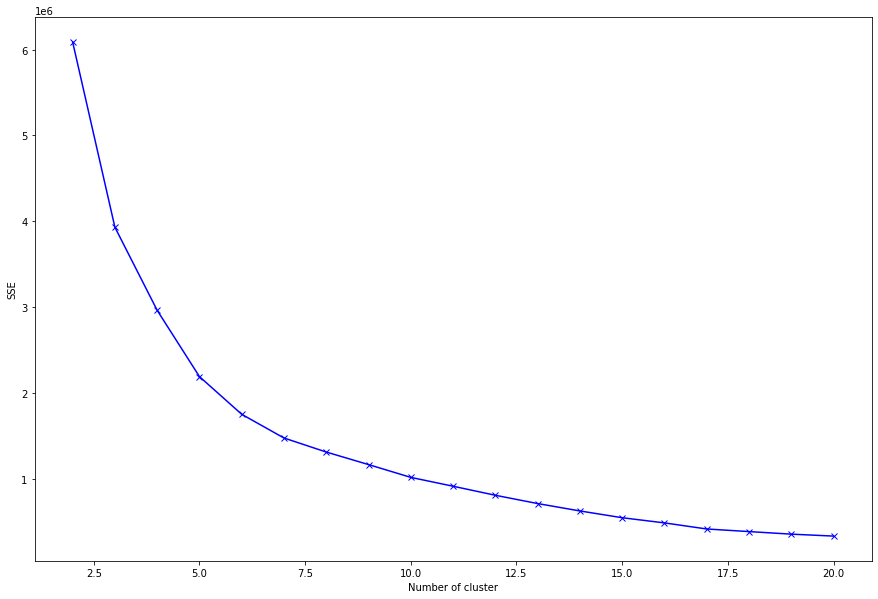

Kmeans - Davies-Bouldin


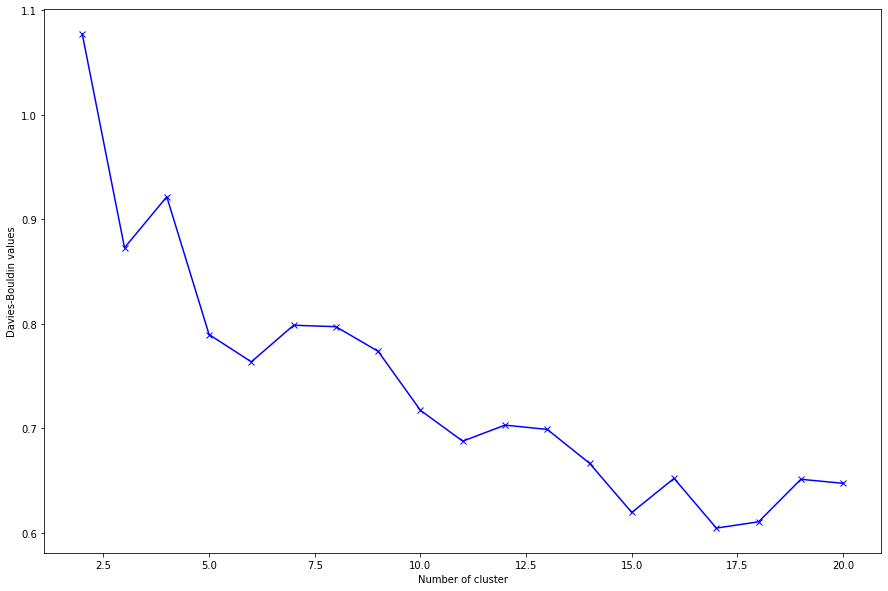

Kmeans - Silhouette


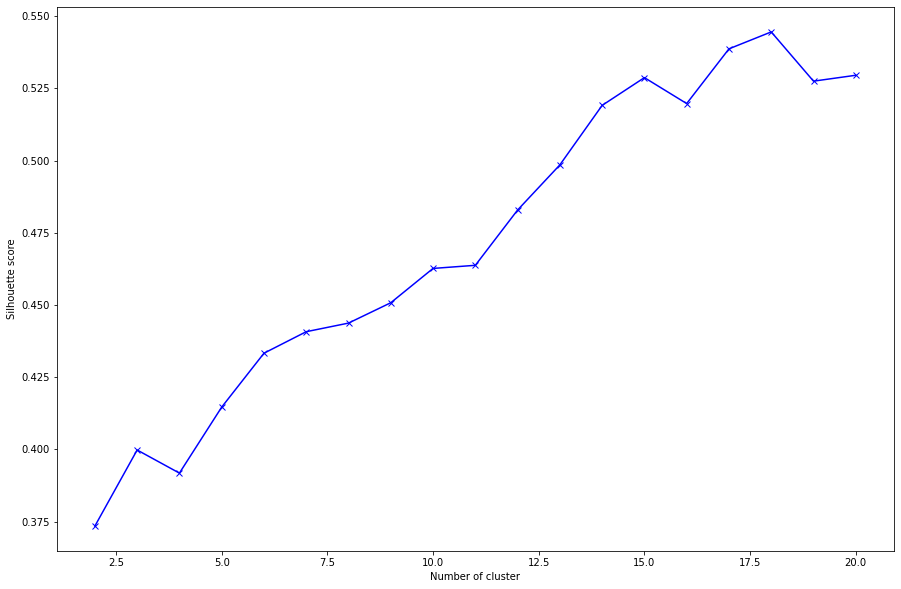

In [29]:
print('KMEAN')
k_optimo_kmeans(data_frame=Xt,k_min=2,k_max=20)

AGLOMERATIVE
Agglomerative - Davies-Bouldin


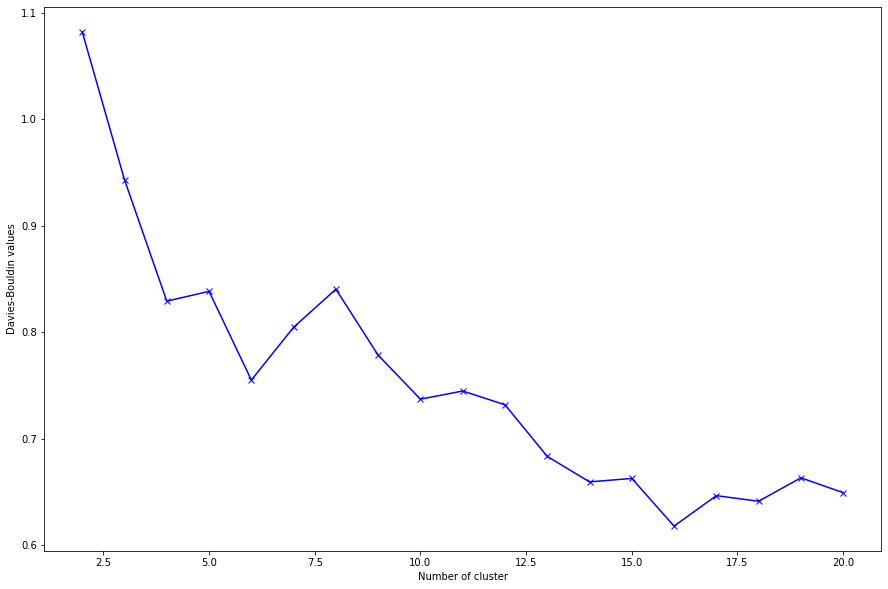

Agglomerative - Silhouette


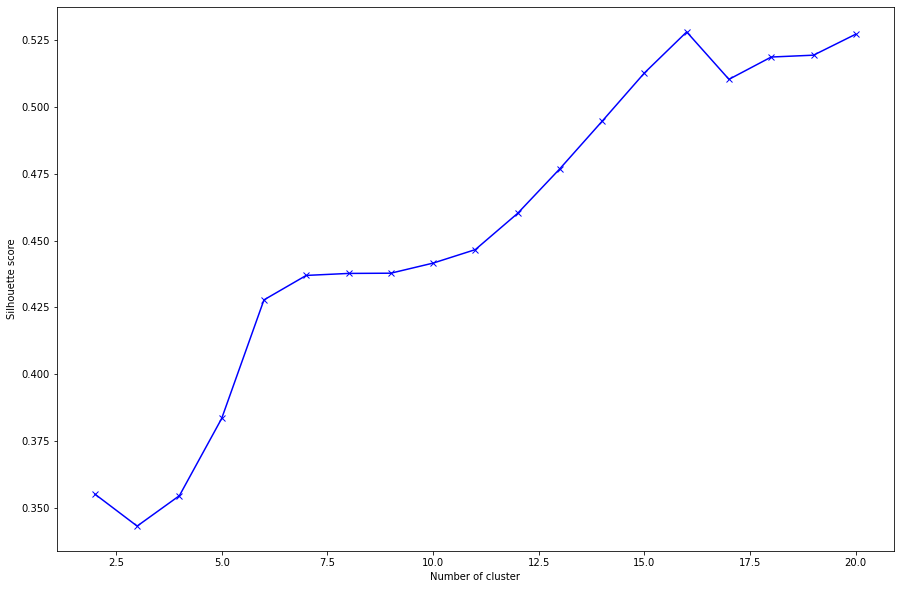

In [30]:
print('AGLOMERATIVE')
k_optimo_aglomerative(data_frame=Xt,k_min=2,k_max=20)

KMEDOIDS
Kmedoids - Método del codo (Inercia)


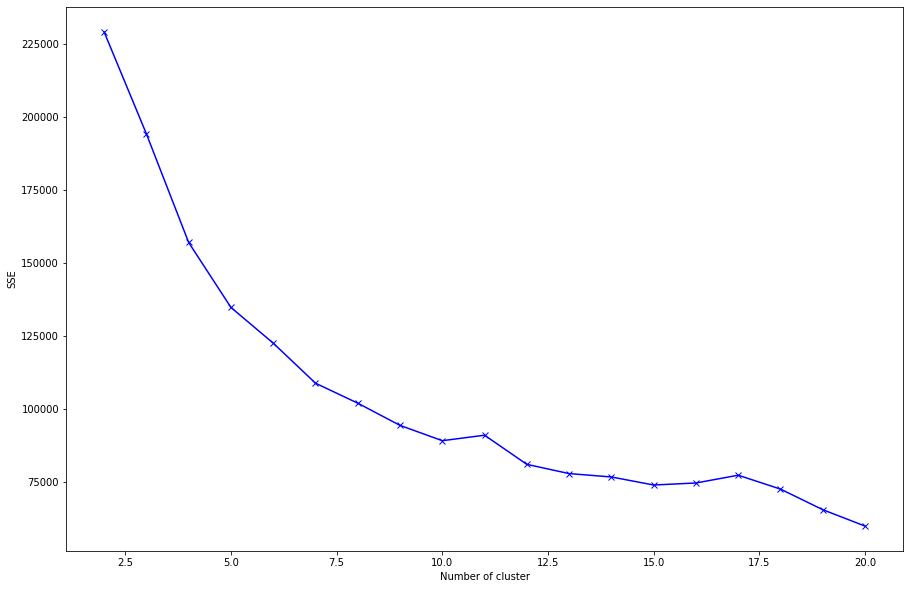

Kmedoids - Davies-Bouldin


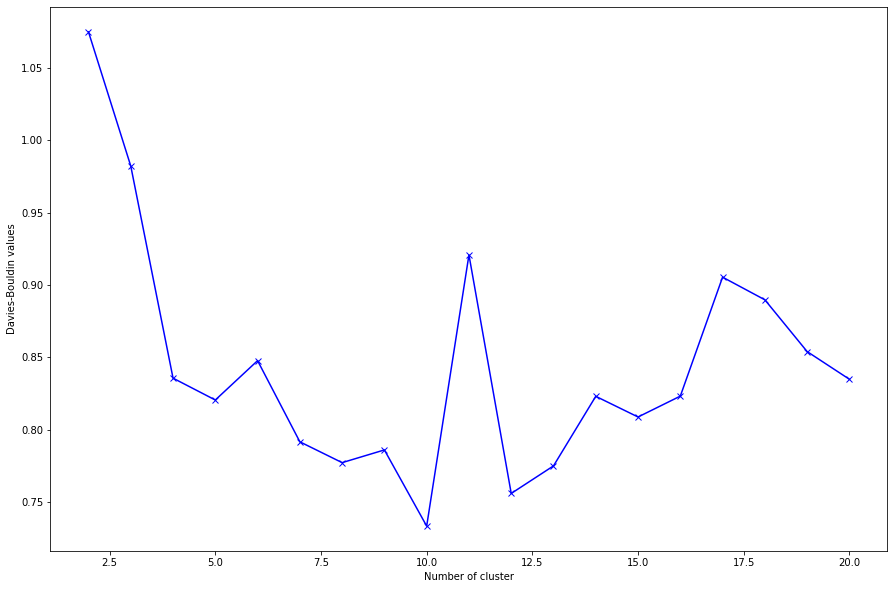

Kmedoids - Silhouette


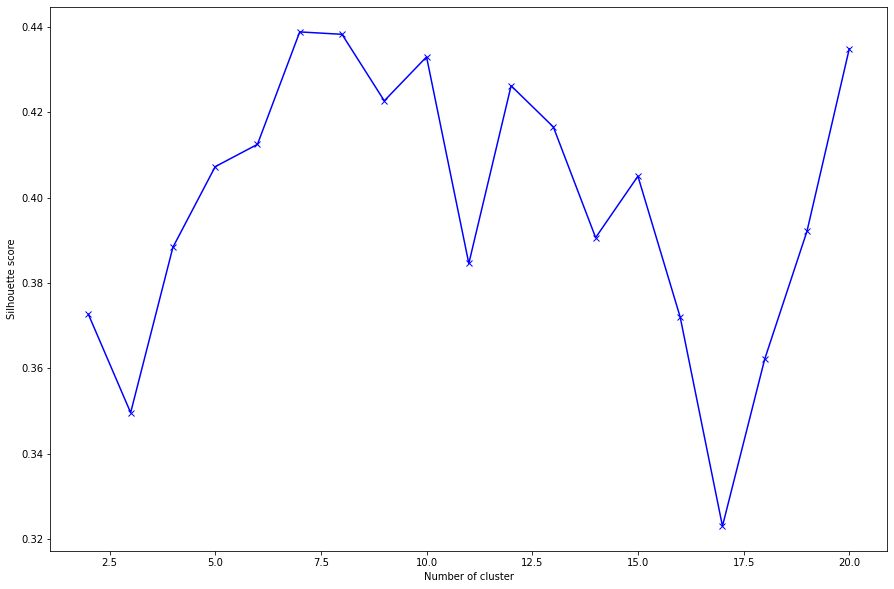

In [31]:
print('KMEDOIDS')
k_optimo_kmedoids(data_frame=Xt,k_min=2,k_max=20)

In [32]:
k=6
df_modelado=Xt
df_original=data_sell_sample
df_escalado=Xt

cluster_kmeans = KMeans(n_clusters=k, n_jobs=-1, random_state=210327,max_iter=1000)
cluster_agglomeratrive = AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="ward" )
cluster_kmedoids = KMedoids(n_clusters=k,max_iter=1000, random_state=210327,metric="euclidean" )

df_escalado["cl_kmeans_t"] = [str(x) for x in cluster_kmeans.fit_predict(df_modelado)]
df_escalado["cl_agglomerative_t"] = [str(x) for x in cluster_agglomeratrive.fit_predict(df_modelado)]
df_escalado["cl_kmedoids_t"] = [str(x) for x in cluster_kmedoids.fit_predict(df_modelado)]

print(colored(f"Kmeans",'red',attrs=['bold']))
df_escalado.reset_index().iplot(kind="scatter", x="d1", y="d2", categories="cl_kmeans_t", mode="markers")
print(colored(f"Agglomerative",'red',attrs=['bold']))
df_escalado.reset_index().iplot(kind="scatter", x="d1", y="d2", categories="cl_agglomerative_t", mode="markers")
print(colored(f"Kmedoids",'red',attrs=['bold']))
df_escalado.reset_index().iplot(kind="scatter", x="d1", y="d2", categories="cl_kmedoids_t", mode="markers")

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



Kmeans


/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



Agglomerative


Kmedoids


In [33]:
data_sell_sample["cl_kmedoids_t"] = [str(x) for x in cluster_kmedoids.fit_predict(Xt)]
cluster_sell_values = data_sell_sample.groupby("cl_kmedoids_t").mean()
cluster_sell = data_sell_sample.groupby("cl_kmedoids_t").mean().style.background_gradient(cmap='Blues')
cluster_sell

_Cluster 0: En el primer segmento se encuentran los departamentos en el centro del país, estos cuentan con una superficie menor y un menor precio de venta. En general hay muy pocas publicaciones de este tipo de inmueble por lo que esto puede ser un factor para bajar el precio del inmueble al no tener un punto de comparación._

_Cluster 1: A quí se encuentran las publicaciones de casas más comunes en el país, tienen un precio promedio y una superficie mayor que la mayoría de los inmuebles ya que en su mayoría son casas, estas casas son no se encuentran en zonas residenciales como la mayoría de las publicaciones._

_Cluster 2: En este segmento se encuentran las casas cerca de zonas industriales, estas cuentan con una superficie y precio promedio, por lo que estan al alcence de todos los trabajadores de estas zonas en el bajío del país._

_Cluster 3: El grupo cuenta con las casas en venta en los estados más grandes de la república, por lo que su tamaño es más grande de lo normal. Igualmente, existe muchas publicaciones con estas características, por lo que los precios no son tan elevados ya que existe una gran competencia en la venta de estos inmuebles._

_Cluster 4: En general este grupo de inmuebles cuenta con casas cerca del Golfo de México y el Caribe, es decir son casa muy cercanas al mar y a la playa, en general son casas con una mayor superficie que el promedio pero con un precio acorde al promedio nacional. Además, estas casas se encuentran en zonas residenciales, por lo que son una gran oportunidad para los amantes del mar._

_Cluster 5: Los inmuebles en este grupo cuenta con la mayor superficie de todas y el mayor precio de todos, se encuentran en zonas cercanas a la frontera, proximos a los estados de Nuevo León y Tamaulipas, por lo que se puede decir que son las grandes casas que se encuentran en la zona de Monterrey y San Pedro Garza García, una de las colonias más caras de todo México._

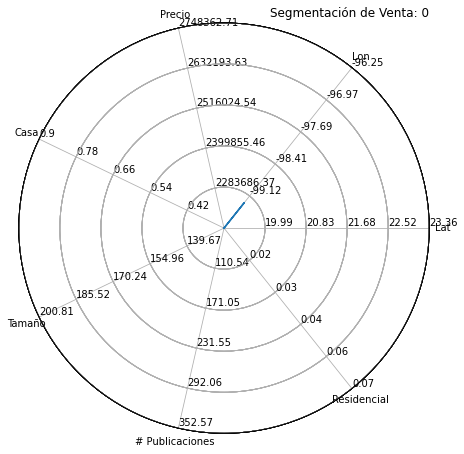

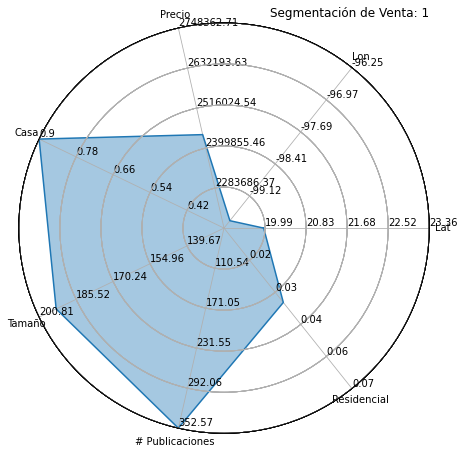

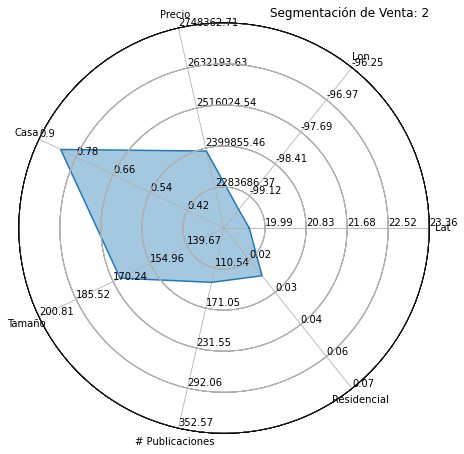

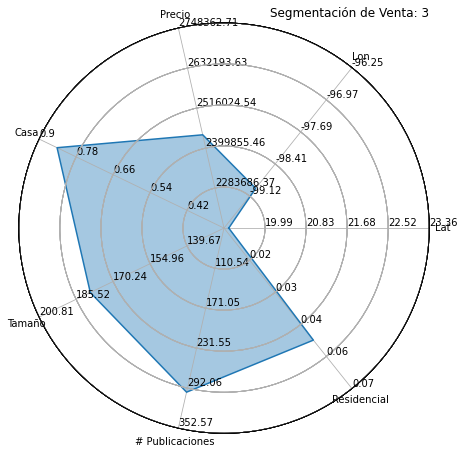

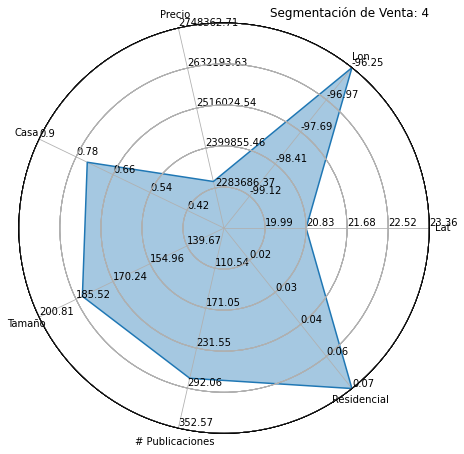

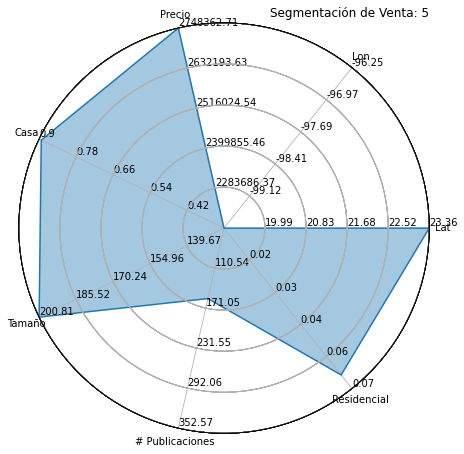

In [34]:
# info datos clusters
n_cluster = 6
variables = ["c_lat", "c_lon", "c_price", 
            "v_property_type_house", "c_surface_covered_in_m2", "v_conteo_geo", "title_residencial"]
variables_p = ["Lat", "Lon", "Precio", "Casa", "Tamaño", "# Publicaciones", "Residencial"]
rangos = list(zip(cluster_sell_values[variables].describe().loc[['min', 'max'], :].values[0],
                  cluster_sell_values[variables].describe().loc[['min', 'max'], :].values[1]))    

for i in range(n_cluster):
    data_plot = tuple(cluster_sell_values[variables].iloc[i,:].values)

    # web plot
    fig1 = plt.figure(figsize=(6, 8))
    radar = ComplexRadar(fig1, variables_p, rangos)
    radar.plot(data_plot)
    radar.fill(data_plot, alpha=.4)
    plt.title('Segmentación de Venta: {}'.format(i), loc = 'right')
    plt.show()

### Renta

KMEAN


/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

/home/edco17/an

Kmeans - Método del codo (Inercia)


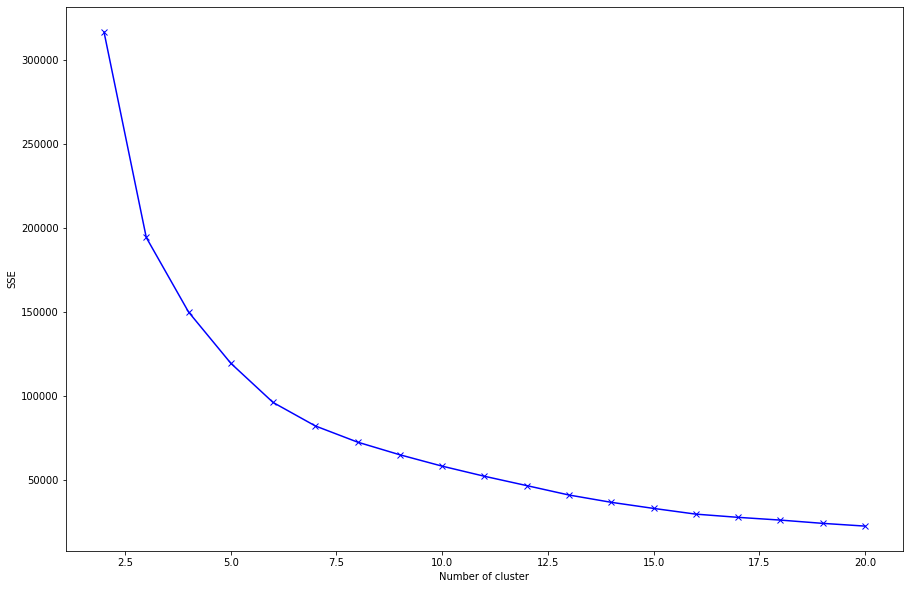

Kmeans - Davies-Bouldin


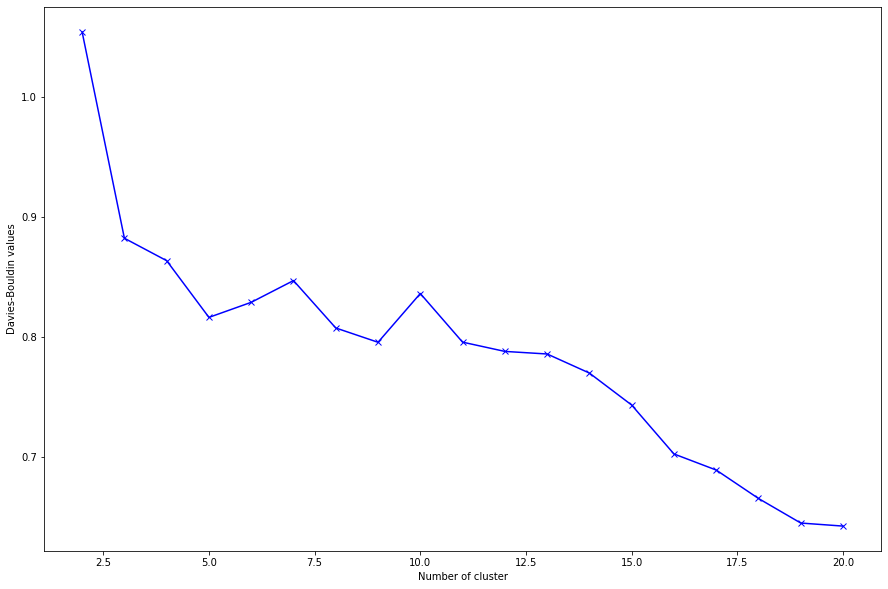

Kmeans - Silhouette


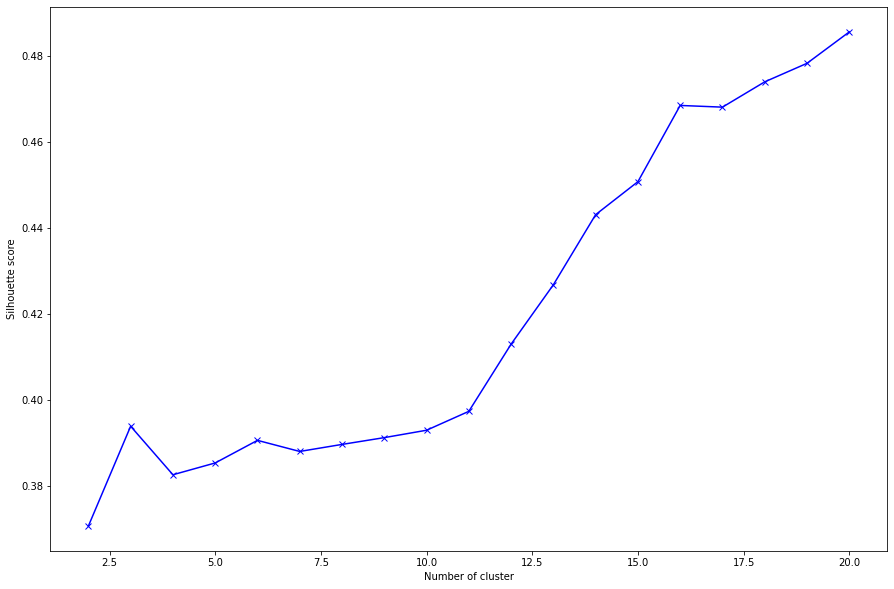

In [35]:
print('KMEAN')
k_optimo_kmeans(data_frame=Xt_r,k_min=2,k_max=20)

AGLOMERATIVE
Agglomerative - Davies-Bouldin


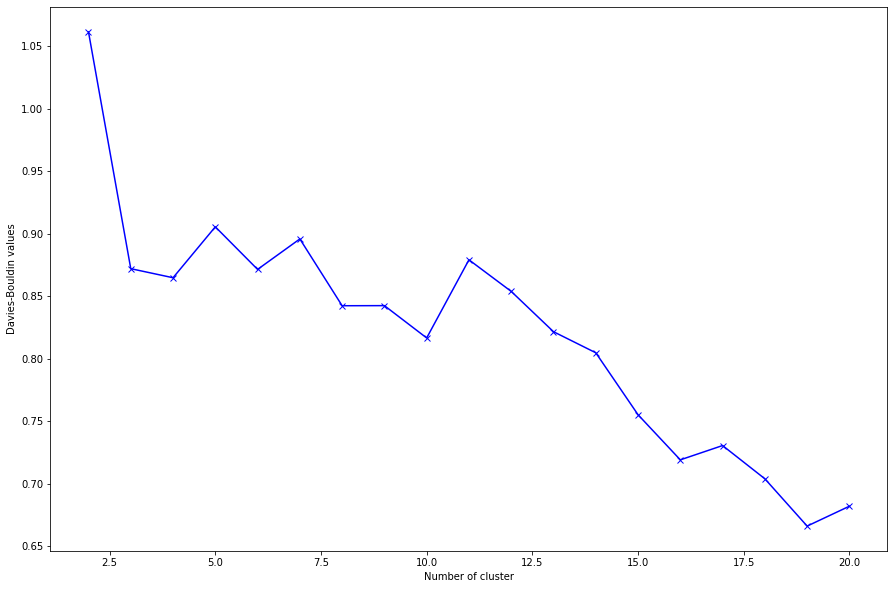

Agglomerative - Silhouette


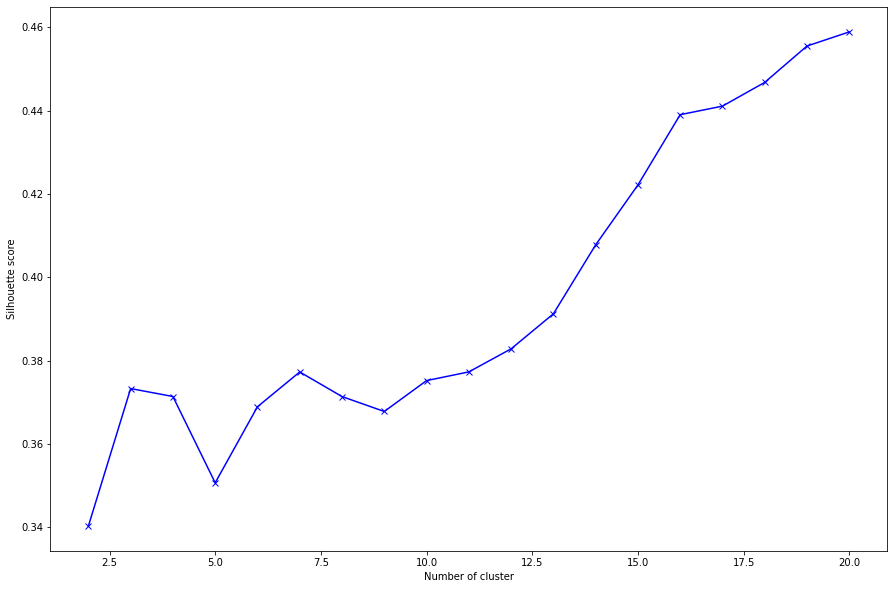

In [36]:
print('AGLOMERATIVE')
k_optimo_aglomerative(data_frame=Xt_r,k_min=2,k_max=20)

KMEDOIDS
Kmedoids - Método del codo (Inercia)


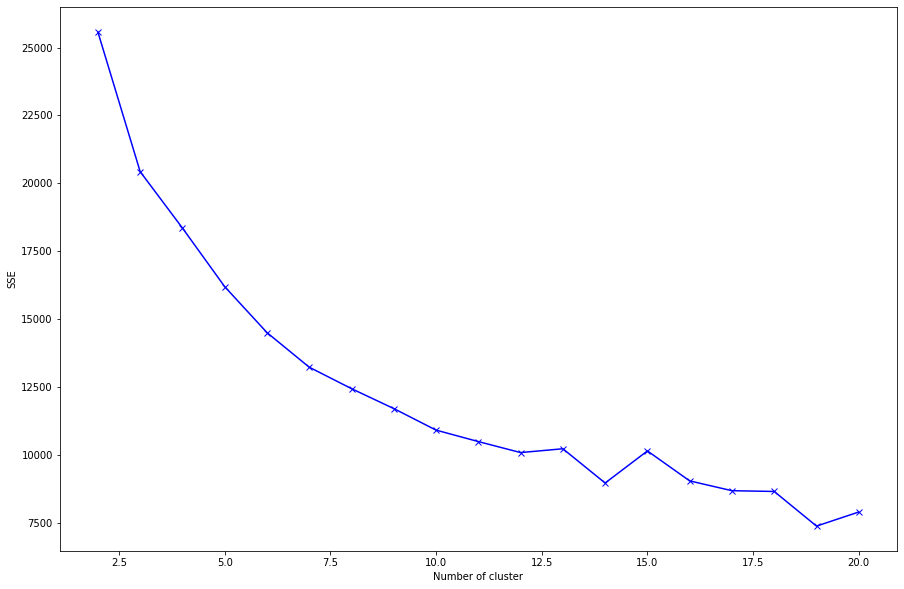

Kmedoids - Davies-Bouldin


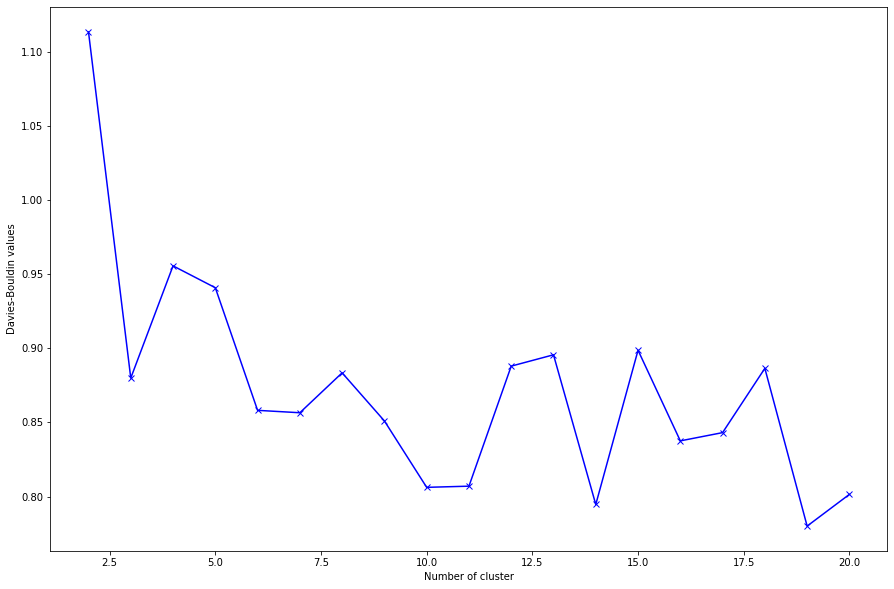

Kmedoids - Silhouette


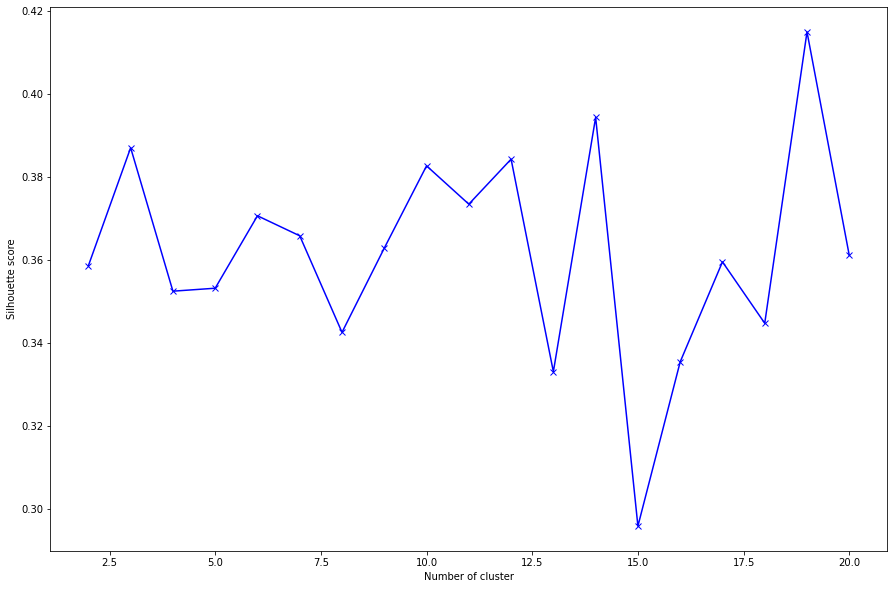

In [37]:
print('KMEDOIDS')
k_optimo_kmedoids(data_frame=Xt_r,k_min=2,k_max=20)

In [38]:
k=6
df_modelado=Xt_r
df_original=data_rent_sample
df_escalado=Xt_r

cluster_kmeans = KMeans(n_clusters=k, n_jobs=-1, random_state=210327,max_iter=1000)
cluster_agglomeratrive = AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="ward" )
cluster_kmedoids = KMedoids(n_clusters=k,max_iter=1000, random_state=210327,metric="euclidean" )

df_escalado["cl_kmeans_t"] = [str(x) for x in cluster_kmeans.fit_predict(df_modelado)]
df_escalado["cl_agglomerative_t"] = [str(x) for x in cluster_agglomeratrive.fit_predict(df_modelado)]
df_escalado["cl_kmedoids_t"] = [str(x) for x in cluster_kmedoids.fit_predict(df_modelado)]

print(colored(f"Kmeans",'red',attrs=['bold']))
df_escalado.reset_index().iplot(kind="scatter", x="d1", y="d2", categories="cl_kmeans_t", mode="markers")
print(colored(f"Agglomerative",'red',attrs=['bold']))
df_escalado.reset_index().iplot(kind="scatter", x="d1", y="d2", categories="cl_agglomerative_t", mode="markers")
print(colored(f"Kmedoids",'red',attrs=['bold']))
df_escalado.reset_index().iplot(kind="scatter", x="d1", y="d2", categories="cl_kmedoids_t", mode="markers")

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



Kmeans


/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



Agglomerative


Kmedoids


In [39]:
data_rent_sample["cl_kmedoids_t"] = [str(x) for x in cluster_kmedoids.fit_predict(Xt_r)]
cluster_rent_values = data_rent_sample.groupby("cl_kmedoids_t").mean()
cluster_rent = data_rent_sample.groupby("cl_kmedoids_t").mean().style.background_gradient(cmap='Blues')
cluster_rent

_Cluster 0: Este segmento se puede identificar como las casas de Verano cercanas a la Ciudad de México, estas cuentan con un precio intermedio y una superficie más grande que el promedio de los otros inmuebles, estas se encuentran en estados donde la densidad de población es baja, esto es ideal para descansar._

_Cluster 1: ESte segmento son las grandes casas ubicadas en los estados del norte del cerca de Golfo de México, estas casas se encuentran en estados muy grandes con poca población y cuentan con un precio de renta más altodel normal._

_CLuster 2: Este segmento cuenta con las casas cercanas a los puertos del Golfo de México, cuentan con una superficie y precio menor al promedio, esta es una buena opción para vacacionar cerca del mar si el presupuesto es limitado._

_Cluster 3: Al igual que el segmento anterior, esta agrupación de inmuebles se encuentra cerca del Golfo de México muy cercano a la parte del Caribe, cuenta con casa más grandes que el anterior segmento y, de igual manera, un precio más elevado, por lo que podemos decir que estas son casa para vacacionar de un nivel más alto. En este cluster están ubicadas los departamentos y casa en Yucatán y Quintana Roo, lo que vuelve las rentas más caras._

_Cluster 4: Este grupo de inmuebles se encuentran las casas en zonas industriales en el bajío de México, cuentan con menor superficie y hay una mayor concentración de personas. Son casas para los trabajadores de todas las industrias._

_Cluster 5: En este segmento ubicamos todos los inmuebles en renta de la Ciudad de México y el Estado de México, ya que se cuenta con un mayor precio de renta en este grupo y menor superficie a comparación de otros. Igualmente, estos inmuebles estan ubicados en zonas con mayor concentración de Población._

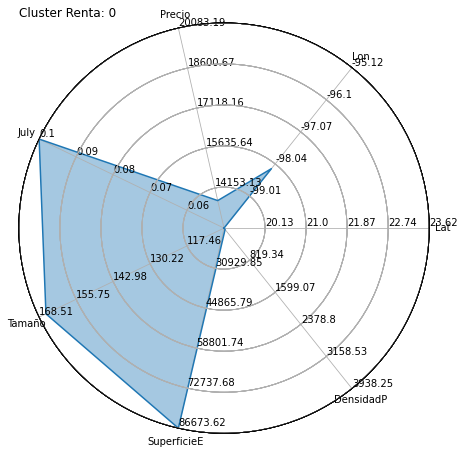

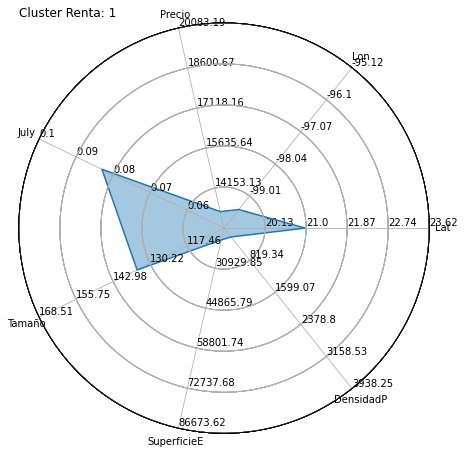

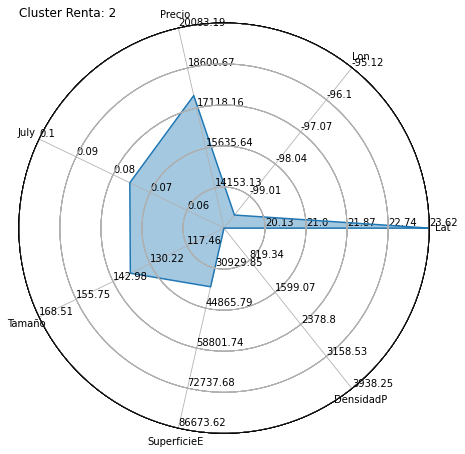

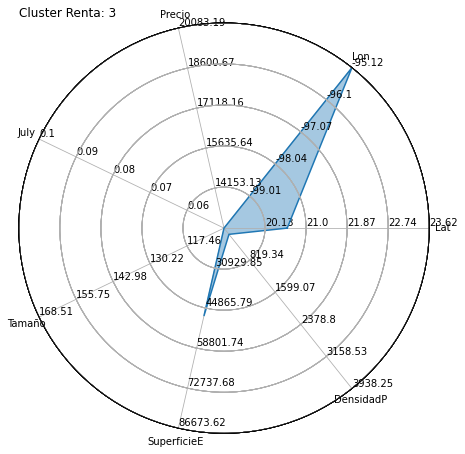

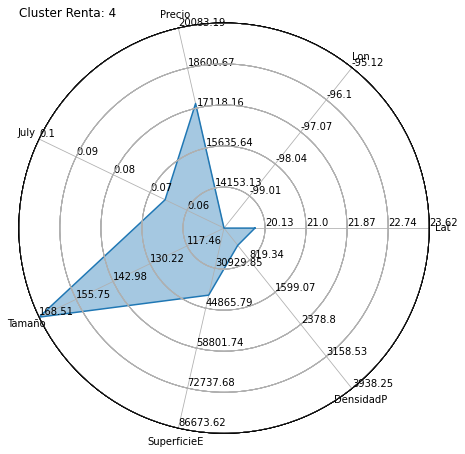

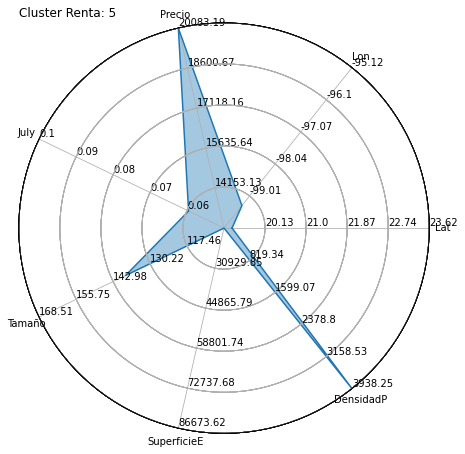

In [40]:
# info datos clusters
n_cluster = 6
variables = ["c_lat", "c_lon", "c_price", 
            "v_mes_7", "c_surface_covered_in_m2", "c_superficie", "c_densidad"]
variables_p = ["Lat", "Lon", "Precio", "July", "Tamaño", "SuperficieE", "DensidadP"]
rangos = list(zip(cluster_rent_values[variables].describe().loc[['min', 'max'], :].values[0],
                  cluster_rent_values[variables].describe().loc[['min', 'max'], :].values[1]))    

for i in range(n_cluster):
    data_plot = tuple(cluster_rent_values[variables].iloc[i,:].values)

    # web plot
    fig1 = plt.figure(figsize=(6, 8))
    radar = ComplexRadar(fig1, variables_p, rangos)
    radar.plot(data_plot)
    radar.fill(data_plot, alpha=.4)
    plt.title('Cluster Renta: {}'.format(i), loc = 'left')
    plt.show()